### Drop Unecessary Features

In [7]:
import pandas as pd

In [32]:
df = pd.read_csv("../processed_data/reddit/processed_pro_qanon.csv")
dff = pd.read_csv("../processed_data/reddit/processed_anti_qanon.csv")

In [33]:
df2 = df.drop(columns=['Report Reasons', ' Removal Reasons', 'Permalink', 'Media Only', 'Media Title', 'Is Original Content', 'Is Crosspostable', 'Num Crossposts', 'Crosspost Parent List - Subdreddit(s)', 'View Count'])
dff2 = dff.drop(columns=['Report Reasons', ' Removal Reasons', 'Permalink', 'Media Only', 'Media Title', 'Is Original Content', 'Is Crosspostable', 'Num Crossposts', 'Crosspost Parent List - Subdreddit(s)', 'View Count'])

In [11]:
df2.head()

,ID,Title,Text,Subreddit,URL,Upvote Ratio,Media Type,Media URL,Subreddit Subscribers,Author,Ups
0,jcgco1,"""Why won't you denounce Qanon!?!?"" Trump: ""The...",b'nan',b'conspiracy',https://i.redd.it/fgd78i2kbit51.jpg,1.00,NaN,NaN,1395552,t2_ewwvg,3
1,jcgc9q,"The Mueller Report: Page 2 ""the investigation ...",b'nan',b'conspiracy',https://www.documentcloud.org/documents/595537...,0.33,NaN,NaN,1395552,t2_12dvhg,0
2,jcg77z,Sheldon Adelson just gave Trump another $75 mi...,b'nan',b'conspiracy',https://www.politico.com/news/2020/10/15/adels...,0.88,NaN,NaN,1395552,t2_nxckpi4,6
3,jcfoau,Last night Trump was asked to denounce Q- a gr...,b'Submission statement: There is clear messagi...,b'conspiracy',https://www.reddit.com/r/conspiracy/comments/j...,0.66,NaN,NaN,1395552,t2_wnd5k,11
4,jcfjni,Trump Calls Biden's Family - 'An Organized Cri...,"b""Just now at his address to seniors in Florid...",b'conspiracy',https://www.reddit.com/r/conspiracy/comments/j...,0.57,NaN,NaN,1395552,t2_tie34,3


In [12]:
dff2.head()

,ID,Title,Text,Subreddit,URL,Upvote Ratio,Media Type,Media URL,Subreddit Subscribers,Author,Ups
0,je1pju,"According to the Holy Messiah, Biden is now si...",b'nan',b'Qult_Headquarters',https://i.redd.it/2xcfi8fo02u51.jpg,0.98,NaN,NaN,32634,t2_wtacu,71
1,je0dgj,QAnon has hijacked the name of a real organiza...,b'nan',b'Qult_Headquarters',https://www.cnn.com/videos/tech/2020/10/19/sav...,0.78,NaN,NaN,32634,t2_fojuj,5
2,jdwy2c,"Loose, superficial mainstream take on a ""key p...",b'nan',b'Qult_Headquarters',https://heavy.com/news/thomas-schoenberger-qanon/,0.89,NaN,NaN,32634,t2_10dzl0,14
3,jdw688,Obviously fake quotes from Qanon mascot Mel Gi...,b'nan',b'Qult_Headquarters',https://www.reddit.com/gallery/jdw688,0.92,NaN,NaN,32634,t2_7qujgkou,31
4,jdv15k,"Uh oh, just a glitch. Interesting who picked u...",b'nan',b'Qult_Headquarters',https://krebsonsecurity.com/2020/10/qanon-8cha...,1.00,NaN,NaN,32634,t2_q48st,24


### Extract LIWC Features

In [25]:
"""Based on an in-lab implementation.
with efficiency update.
"""
# Author: Zixiaofan (Brenda) Yang, brenda@cs.columbia.edu.
# Please contact me if you have any questions
# The LIWC dictionary file is only distributed to users who bought the original software, so please don't distribute it outside speech lab, thanks!

from collections import defaultdict
import numpy as np
import scipy
from scipy import stats
from tqdm import tqdm
from typing import List, Text, Optional, Dict


# we separate this out into a independent directory.
LIWC_PATH = './pliwc/LIWC2015_English.dic'

In [26]:
def get_all_categories(dic_file: Text = LIWC_PATH) -> List[Text]:
    """
    Get all category names in the LIWC dictionray

    Output:
        cat_list: all categories in the dictionary

    Parameters:
        dic_file: a LIWC style dictionary file
            English: ./LIWC2015_English.dic
            Chinese: ./Simplified_Chinese_LIWC2015_Dictionary.dic
    """
    liwc_dic = open(dic_file, 'r', encoding="utf-8")
    phase = 0
    cat_list = []
    for line in liwc_dic:
        line = line.strip()
        if '%' in line:
            phase += 1
            continue
        if phase == 1:  # category phase
            while '\t' in line:
                line = line.replace('\t', ' ')
            while '  ' in line:
                line = line.replace('  ', ' ')
            if line.split(' ')[0].isdigit():
                cat_list.append(line.split(' ')[1])
        if phase == 2:
            break
    return cat_list

In [27]:
cat_list = get_all_categories()

In [28]:
print(cat_list)

['function', 'pronoun', 'ppron', 'i', 'we', 'you', 'shehe', 'they', 'ipron', 'article', 'prep', 'auxverb', 'adverb', 'conj', 'negate', 'verb', 'adj', 'compare', 'interrog', 'number', 'quant', 'affect', 'posemo', 'negemo', 'anx', 'anger', 'sad', 'social', 'family', 'friend', 'female', 'male', 'cogproc', 'insight', 'cause', 'discrep', 'tentat', 'certain', 'differ', 'percept', 'see', 'hear', 'feel', 'bio', 'body', 'health', 'sexual', 'ingest', 'drives', 'affiliation', 'achieve', 'power', 'reward', 'risk', 'focuspast', 'focuspresent', 'focusfuture', 'relativ', 'motion', 'space', 'time', 'work', 'leisure', 'home', 'money', 'relig', 'death', 'informal', 'swear', 'netspeak', 'assent', 'nonflu', 'filler']


In [29]:
def get_words_in_category(category: Text,
                          dic_file: Text = LIWC_PATH):
    """
    Get all words in dictionary for a certain LIWC category

    Output:
        word_list: all words in the category

    Parameters:
        dic_file: a LIWC style dictionary file
            English: ./LIWC2015_English.dic
            Chinese: ./Simplified_Chinese_LIWC2015_Dictionary.dic
        category: a LIWC category name
    """
    liwc_dic = open(dic_file, 'r', encoding="utf-8")
    phase = 0
    word_list = []
    index = None
    for line in liwc_dic:
        line = line.strip()
        if '%' in line:
            phase += 1
            if phase == 2 and index is None:
                print('cannot find this liwc category')
                return []
            continue
        if phase == 1:  # category phase
            while '\t' in line:
                line = line.replace('\t', ' ')
            while '  ' in line:
                line = line.replace('  ', ' ')
            if line.split(' ')[1] == category:
                index = line.split(' ')[0]
        if phase == 2:  # word phase
            while '\t' in line:
                line = line.replace('\t', ' ')
            while '  ' in line:
                line = line.replace('  ', ' ')
            fields = line.split(' ')
            if index in fields:
                word_list.append(fields[0])
    # print('found words: ', word_list)
    return word_list

def liwc_categories_in_data(categories: List[Text], liwc_list: List[Text],
                            word_with_star: Optional[bool] = True,
                            normalize: Optional[bool] = True) -> List[Dict[Text, float]]:
    """A more efficient implementation of the liwc feature extraction
    process, where we can run multiple categories on multiple input,
    only once.

    categories: --- category specification to be calculated.
    liwc_list: --- text list that is to be analysed, for each line of text an individual liwc feature is calculated.
    word_with_star: --- whether taking wild-card matching into account
    normalize: --- whether to normalize the LIWC features to [0, 1]
    """

    cat_word_lists = {}
    for category in categories:
        word_list = get_words_in_category(category)
        #  elif isinstance(category, list):
        #      word_list = category

        affix_word_list = []
        if word_with_star:
            original_word_list = word_list[:]
            word_list = []
            for word in original_word_list:
                if '*' in word:
                    affix_word_list.append(word)
                else:
                    word_list.append(word)

        cat_word_lists[category] = (word_list, affix_word_list)

    #  lines = liwc_file.readlines()[start_row:]
    result = []
    for line in liwc_list:
        word_count = defaultdict(int)
        #  line = line.strip().split(',')[text_column].lower()
        # TODO: adding more regularization if needed
        text = line.lower().split(' ')
        for wt in text:
            word_count[wt] += 1

        sum_len = sum([word_count[wt] for wt in word_count])
        cat_feat = {}

        for category in categories:
            word_list, affix_word_list = cat_word_lists[category]
            c_count = 0
            for w in word_list:
                if w in word_count:
                    c_count += word_count[w]

            for w in affix_word_list:
                for text_w in word_list:
                    if text_w[:len(w)-1] == w[:-1]:
                        c_count += word_count[text_w]

            cat_feat[category] = c_count

        result.append({cat: cat_feat[cat] / (sum_len if normalize else 1) for cat in categories})

    return result

In [59]:
df2["AllText"] = df2["Title"] + df2["Text"].apply(lambda x: "" if str(x)[2:-1]=='nan'else str(x)[2:-1])

In [60]:
result = liwc_categories_in_data(cat_list, list(df2["AllText"]))

In [61]:
result

[{'function': 0.3333333333333333,
  'pronoun': 0.1111111111111111,
  'ppron': 0.1111111111111111,
  'i': 0.0,
  'we': 0.0,
  'you': 0.1111111111111111,
  'shehe': 0.0,
  'they': 0.0,
  'ipron': 0.0,
  'article': 0.0,
  'prep': 0.1111111111111111,
  'auxverb': 0.1111111111111111,
  'adverb': 0.0,
  'conj': 0.0,
  'negate': 0.1111111111111111,
  'verb': 0.1111111111111111,
  'adj': 0.0,
  'compare': 0.0,
  'interrog': 0.0,
  'number': 0.0,
  'quant': 0.0,
  'affect': 0.0,
  'posemo': 0.0,
  'negemo': 0.0,
  'anx': 0.0,
  'anger': 0.0,
  'sad': 0.0,
  'social': 0.1111111111111111,
  'family': 0.0,
  'friend': 0.0,
  'female': 0.0,
  'male': 0.0,
  'cogproc': 0.1111111111111111,
  'insight': 0.0,
  'cause': 0.0,
  'discrep': 0.0,
  'tentat': 0.0,
  'certain': 0.0,
  'differ': 0.1111111111111111,
  'percept': 0.0,
  'see': 0.0,
  'hear': 0.0,
  'feel': 0.0,
  'bio': 0.0,
  'body': 0.0,
  'health': 0.0,
  'sexual': 0.0,
  'ingest': 0.0,
  'drives': 0.0,
  'affiliation': 0.0,
  'achieve': 0.0

In [65]:
columns = list(result[0].keys())

In [66]:
for c in columns:
    df2[c] = [i[c] for i in result]

In [68]:
df2['differ']

0       0.111111
1       0.071429
2       0.000000
3       0.025974
4       0.032258
          ...   
2566    0.000000
2567    0.000000
2568    0.000000
2569    0.028689
2570    0.153846
Name: differ, Length: 2571, dtype: float64

In [70]:
df2.to_csv("pro_qanon_with_liwc.csv")

In [34]:
dff2["AllText"] = dff2["Title"] + dff2["Text"].apply(lambda x: "" if str(x)[2:-1]=='nan'else str(x)[2:-1])
result_anti = liwc_categories_in_data(cat_list, list(dff2["AllText"]))
columns = list(result_anti[0].keys())
for c in columns:
    dff2[c] = [i[c] for i in result_anti]

In [35]:
dff2.to_csv("anti_qanon_with_liwc.csv")

### Extracting unigrams, bigrams, trigrams

In [37]:
import pandas as pd

In [38]:
all_features_table_pro = pd.read_csv("pro_qanon_with_liwc.csv")
all_features_table_pro = all_features_table_pro.drop(columns=["Title", "Text", "Unnamed: 0"])
all_features_table_anti = pd.read_csv("anti_qanon_with_liwc.csv")
all_features_table_anti = all_features_table_anti.drop(columns=["Title", "Text", "Unnamed: 0"])

In [39]:
all_features_table_pro["Output"] = 1
all_features_table_anti["Output"] = 0

In [40]:
all_data = pd.concat([all_features_table_pro, all_features_table_anti])

In [41]:
all_data_shuffle = all_data.sample(frac = 1).reset_index(drop=True)

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = list(all_data_shuffle["AllText"])
vectorizer = CountVectorizer(ngram_range=(1,3), stop_words='english', min_df=0.05)
X = vectorizer.fit_transform(corpus)

In [58]:
columns = vectorizer.get_feature_names()

In [60]:
arr_X = X.toarray()

In [62]:
for i in range(0, len(columns)):
    all_data_shuffle[columns[i]] = arr_X[:,i]

In [64]:
all_data_shuffle.to_csv("training_all_features.csv")

### Choosing Features

Methods
1. Univariate Selection
2. Feature Importance
3. Correlation Matrix with Heatmap

In [91]:
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [92]:
data = pd.read_csv("training_all_features.csv")

In [93]:
len(list(data.columns))

232

In [94]:
X_kbest = data.drop(columns=["ID", "Unnamed: 0", "Output", "AllText",'Subreddit',
 'URL','Media Type','Media URL','Author'])  #independent columns
y_kbest = data["Output"]   #target column i.e price range

In [98]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=223)
fit = bestfeatures.fit(X_kbest,y_kbest)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_kbest.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

l = featureScores.nlargest(223,'Score')

,Specs,Score
1,Subreddit Subscribers,5.620038e+08
2,Ups,2.934175e+03
131,https,9.347443e+02
96,com,3.611305e+02
155,news,3.435718e+02
...,...,...
35,cogproc,1.323808e+00
206,trying,1.314019e+00
6,i,1.156021e+00
4,pronoun,1.094965e+00


In [121]:
l_limit = l[l["Score"]>10]

In [124]:
list(l_limit["Specs"])

['Subreddit Subscribers',
 'Ups',
 'https',
 'com',
 'news',
 'trump',
 'youtube',
 '2020',
 'watch',
 'biden',
 'qanon',
 'reddit',
 'children',
 'html',
 'child',
 'military',
 'trafficking',
 'government',
 'people',
 '11',
 'human',
 'states',
 'man',
 'old',
 'years',
 'operation',
 'media',
 'http',
 'control',
 'org',
 'state',
 'president',
 'good',
 'clinton',
 'world',
 'https www',
 'satanic',
 'united',
 'used',
 'case',
 'new',
 'www',
 '10',
 'story',
 'time',
 'intelligence',
 'human trafficking',
 'post',
 'money',
 'donald',
 'sex',
 'public',
 'war',
 'election',
 'big',
 'make',
 'point',
 'great',
 'just',
 'called',
 'evidence',
 'end',
 'like',
 'sex trafficking',
 'right',
 'pedophile',
 'order',
 'group',
 'america',
 'use',
 'conspiracy',
 'said',
 'year',
 'evil',
 'black',
 'american',
 'abuse',
 'pedophiles',
 'know',
 'way',
 'believe',
 'using',
 'did',
 'want',
 'Upvote Ratio',
 'work',
 'history',
 'country',
 'fact',
 'theories',
 'think',
 'don',
 'pow

### Feature Importances

In [101]:
import pandas as pd
import numpy as np

[0.09211771 0.13480985 0.01170923 0.01410015 0.00918028 0.00657135
 0.00601248 0.00311431 0.00429041 0.00427537 0.00362657 0.00799692
 0.01227738 0.00912254 0.01006744 0.00951531 0.00803434 0.00416319
 0.00939307 0.00709564 0.00599029 0.00624894 0.00286132 0.00660289
 0.00634692 0.00613848 0.00454723 0.00191322 0.00276638 0.0021975
 0.00117149 0.00173376 0.00164015 0.0029911  0.00470193 0.00897856
 0.00639522 0.00505989 0.0043554  0.00583964 0.00456562 0.00716138
 0.00534579 0.00450421 0.00407185 0.00138123 0.00490257 0.00263079
 0.00246962 0.0046505  0.00129251 0.00695161 0.00474892 0.00436409
 0.00213413 0.00401051 0.00324989 0.00644424 0.01065465 0.00512078
 0.00814192 0.00665385 0.00712303 0.0020418  0.00117865 0.00390822
 0.00257707 0.0016929  0.00167197 0.00149286 0.00338179 0.00128358
 0.00274353 0.00152643 0.00194557 0.00045608 0.00169875 0.00250592
 0.00167752 0.00214758 0.00159969 0.00206396 0.00151806 0.00492753
 0.00185647 0.00126872 0.00195888 0.01395459 0.00185    0.00139

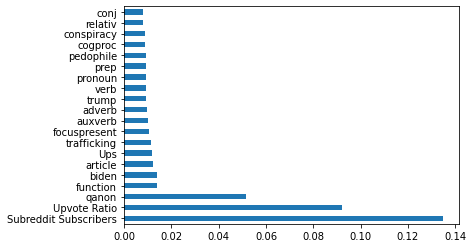

In [108]:
data = pd.read_csv("training_all_features.csv")
X_fi = data.drop(columns=["ID", "Unnamed: 0", "Output", "AllText",'Subreddit',
 'URL','Media Type','Media URL','Author'])  #independent columns
y_fi = data["Output"]   #target column i.e price range

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_fi,y_fi)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_fi.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [110]:
f = feat_importances

In [ ]:
f[f["Score"]>10]

In [119]:
for k in dict(f):
    if f[k] < 0.005:
        del f[k]

In [126]:
dict(f).keys()

dict_keys(['Upvote Ratio', 'Subreddit Subscribers', 'Ups', 'function', 'pronoun', 'ppron', 'i', 'ipron', 'article', 'prep', 'auxverb', 'adverb', 'conj', 'verb', 'adj', 'compare', 'interrog', 'quant', 'affect', 'posemo', 'cogproc', 'insight', 'cause', 'tentat', 'differ', 'percept', 'drives', 'focuspast', 'focuspresent', 'focusfuture', 'relativ', 'motion', 'space', 'biden', 'conspiracy', 'pedophile', 'pedophiles', 'qanon', 'satanic', 'theory', 'trafficking', 'trump'])